<a href="https://colab.research.google.com/github/RancyChepchirchir/hello-world/blob/master/NM_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
call = pd.read_csv('./sample_data/call.csv')
put = pd.read_csv('./sample_data/put.csv')

In [0]:
data = (np.random.randint(low=99, high=102, size=9))
underlying = pd.DataFrame(data, columns=['underlying'])
####add the dataframe to the call and put data
call['underlying'] = underlying
put['underlying'] = underlying

In [0]:
call.head()

,call_strike,t=0.25,t=0.5,t=1,t=1.5,underlying
0,60,40.2844,42.4249,50.8521,59.1664,99
1,70,30.5281,33.5355,42.6656,51.2181,99
2,80,21.0415,24.9642,34.4358,42.9436,100
3,90,12.2459,16.9652,26.4453,34.7890,101
4,100,5.2025,10.1717,19.4706,27.8938,100


In [0]:
put.head()

,put_strike,t=0.25,t=0.5,t=1.0,t=1.5,underlying
0,60,0.0858,2.1546,10.6907,19.3603,99
1,70,0.2548,3.1164,12.2087,20.9720,99
2,80,0.6934,4.3962,13.6833,22.2575,100
3,90,1.8232,6.2483,15.3972,23.6629,101
4,100,4.7050,9.3060,18.1270,26.3276,100


In [0]:
call.describe().T

,count,mean,std,min,25%,50%,75%,max
call_strike,9.0,100.000000,27.386128,60.0000,80.0000,100.0000,120.0000,140.0000
t=0.25,9.0,12.319544,15.043608,0.0019,0.2052,5.2025,21.0415,40.2844
t=0.5,9.0,15.381400,15.204612,0.7542,2.7647,10.1717,24.9642,42.4249
t=1,9.0,24.043656,15.592526,7.7410,11.2103,19.4706,34.4358,50.8521
t=1.5,9.0,33.047844,14.997360,18.1858,20.7206,27.8938,42.9436,59.1664
underlying,9.0,100.000000,0.866025,99.0000,99.0000,100.0000,101.0000,101.0000


In [0]:
put.describe().T

,count,mean,std,min,25%,50%,75%,max
put_strike,9.0,100.000000,27.386128,60.0000,80.0000,100.0000,120.0000,140.0000
t=0.25,9.0,10.710922,12.265372,0.0858,0.6934,4.7050,19.5582,29.2999
t=0.5,9.0,14.515633,13.171368,2.1546,4.3962,9.3060,21.6012,39.2929
t=1.0,9.0,22.700078,12.053060,10.6907,13.6833,18.1270,29.2757,45.2152
t=1.5,9.0,31.481667,12.461600,19.3603,22.2575,26.3276,38.2744,54.8595
underlying,9.0,100.000000,0.866025,99.0000,99.0000,100.0000,101.0000,101.0000


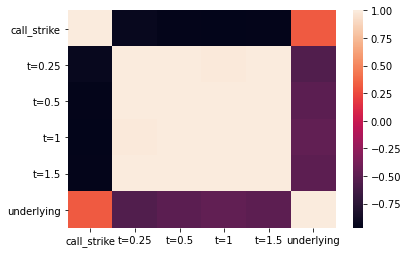

In [0]:
cor1 = call.corr()
sns.heatmap(cor1)

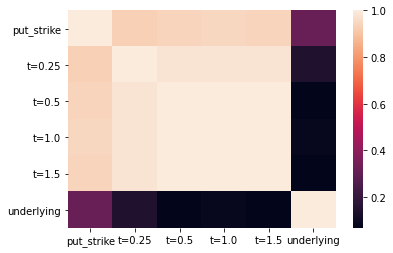

In [0]:
cor2 = put.corr()
sns.heatmap(cor2)

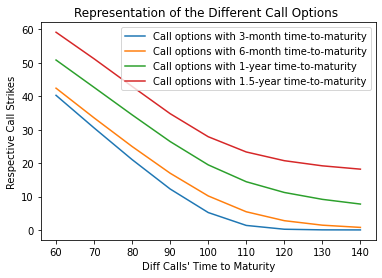

In [0]:
plt.plot(call['call_strike'], call['t=0.25'], label ="Call options with 3-month time-to-maturity")
plt.plot(call['call_strike'], call['t=0.5'], label ="Call options with 6-month time-to-maturity")
plt.plot(call['call_strike'], call['t=1'], label ="Call options with 1-year time-to-maturity")
plt.plot(call['call_strike'], call['t=1.5'], label ="Call options with 1.5-year time-to-maturity")
plt.title('Representation of the Different Call Options ')
plt.ylabel('Respective Call Strikes')
plt.xlabel('Diff Calls\' Time to Maturity')
plt.legend()
plt.show()

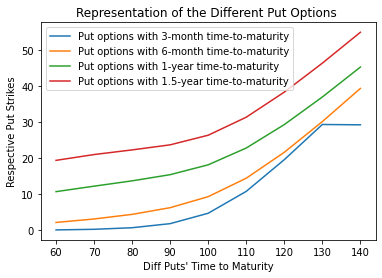

In [0]:
plt.plot(put['put_strike'], put['t=0.25'], label ="Put options with 3-month time-to-maturity")
plt.plot(put['put_strike'], put['t=0.5'], label ="Put options with 6-month time-to-maturity")
plt.plot(put['put_strike'], put['t=1.0'], label ="Put options with 1-year time-to-maturity")
plt.plot(put['put_strike'], put['t=1.5'], label ="Put options with 1.5-year time-to-maturity")
plt.title('Representation of the Different Put Options ')
plt.ylabel('Respective Put Strikes')
plt.xlabel('Diff Puts\' Time to Maturity')
plt.legend()
plt.show()

In [0]:
#The current index price is $100 and the term structure of interest rates is constant at 3%
x = np.random.randint(99, 101, 54**2, dtype=int)
underlying = x.reshape(54,54)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  


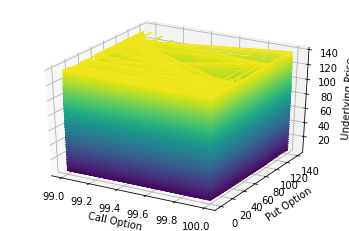

In [0]:
Z = underlying
X, Y = np.meshgrid(call, put)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Z, X, Y, 50,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('Call Option')
ax.set_ylabel('Put Option')
ax.set_zlabel('Underlying Price');

In [0]:
# recall BSM model, to get the implied volatility

norm.cdf(1.96)
#c_p - Call(+1) or Put(-1) option
#P - Price of option
#K - Strike price
#T - Time to expiration
#rf - Risk-free rate

#c = SN(d_1) - Ke^{-rT}N(d_2)


def implied_volatility(price,underlying,strike,time,r):
    p = price
    S = underlying
    K = strike
    T = time
    r = 0.03
    sigma = 0.00001
    print (p, S, K, T, r)
    while sigma < 1:
        d_1 = (math.log(S/K)+(r+(sigma**2)/2)*T/(sigma*(math.sqrt(T))))
        d_2 = (math.log(S/K)+(r-(sigma**2)/2)*T/(sigma*(math.sqrt(T))))
        P_implied = S*norm.cdf(d_1) - K*math.exp(-r*T)*norm.cdf(d_2)
        if p-(P_implied) < 0.00001:
            return sigma
        sigma +=0.001
    return "could not find an accurate volatility"

implied_volatility(15,100,100,1,0.03)

15 100 100 1 0.03


0.34501000000000026

In [0]:
!pip install mibian
from mibian import BS

In [0]:
nifty_data = pd.read_csv('./sample_data/Option_data_NIFTY.csv')
nifty_data['IV'] = 0

In [0]:
nifty_data.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value,Time to Expiry,IV
0,NIFTY,10-11-2017,28-Dec-17,CE,10100,342.00,384.55,319.95,346.65,357.25,346.65,369,2891.94,96.77,270000,6000,10321.75,48,0
1,NIFTY,10-11-2017,28-Dec-17,CE,10200,274.05,308.15,246.00,280.10,288.00,280.10,814,6395.29,168.19,463125,1200,10321.75,48,0
2,NIFTY,10-11-2017,28-Dec-17,CE,10300,213.15,239.05,184.95,214.45,220.00,214.45,2489,19614.17,386.64,583650,7725,10321.75,48,0
3,NIFTY,10-11-2017,28-Dec-17,CE,10400,156.10,177.75,133.40,153.65,161.45,153.65,2648,20963.42,309.02,436650,3675,10321.75,48,0
4,NIFTY,10-11-2017,28-Dec-17,CE,10500,117.45,128.45,92.60,112.20,117.70,112.20,8500,67640.94,703.44,1862175,2625,10321.75,48,0


In [0]:
nifty_data.describe()

,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value,Time to Expiry,IV
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.00000,119.0
mean,10900.000000,64.475210,71.138655,55.601681,63.381513,62.166387,61.573950,3452.000000,27617.414706,204.640168,4.834815e+05,21512.394958,10235.492857,43.00000,0.0
std,491.969408,92.679692,100.307529,81.924004,87.495570,88.959114,88.626904,4107.624711,32668.807970,292.578999,4.899337e+05,48910.911411,66.266911,2.94008,0.0
min,10100.000000,0.000000,0.000000,0.000000,1.400000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000e+00,-127125.000000,10118.050000,38.00000,0.0
25%,10500.000000,3.450000,4.075000,2.775000,6.400000,3.525000,3.225000,215.000000,1829.620000,0.530000,9.487500e+04,0.000000,10186.600000,41.00000,0.0
50%,10900.000000,14.250000,17.500000,11.800000,19.600000,14.600000,13.450000,1701.000000,14672.870000,35.950000,3.662250e+05,4800.000000,10224.950000,43.00000,0.0
75%,11300.000000,93.725000,105.700000,79.000000,90.200000,88.100000,90.200000,6096.500000,47942.635000,304.980000,7.081125e+05,37537.500000,10298.750000,45.00000,0.0
max,11700.000000,361.450000,384.550000,319.950000,346.650000,357.250000,346.650000,16289.000000,128968.100000,1187.310000,1.930800e+06,191700.000000,10321.750000,48.00000,0.0


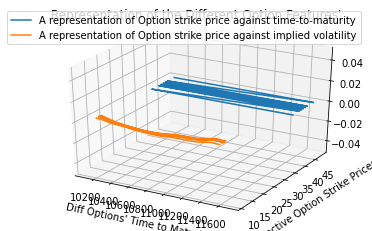

In [0]:
plt.axes(projection='3d')
plt.plot(nifty_data['Strike Price'], nifty_data['Time to Expiry'], label ="A representation of Option strike price against time-to-maturity")
plt.plot(nifty_data['Strike Price'], nifty_data['IV'], label ="A representation of Option strike price against implied volatility")
plt.title('Representation of the Different Option Features\' ')
plt.ylabel('Strike Prices')
plt.xlabel('Time to Maturity')
plt.legend()
plt.show()

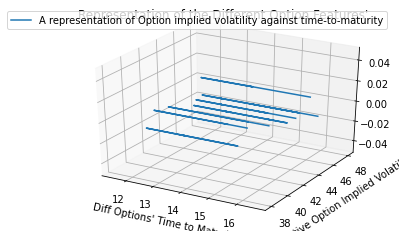

In [0]:
plt.axes(projection='3d')
plt.plot(nifty_data['IV'], nifty_data['Time to Expiry'],label ="A representation of Option implied volatility against time-to-maturity")
plt.title('Representation of the Different Option Features\' ')
plt.ylabel('Implied Volatility')
plt.xlabel('Time to Maturity')
plt.legend()
plt.show()

We will now compute the implied volatilities on different dates for all the options in the dataframe niftydata. We do so by running a for loop, iterating over all the rows of the dataframe niftydata. We then define the different variables which will be used to call the BS function for computing the implied volatility. The interest rate is set to 0 because the value of the underlying in our dataframe is the value of the futures contract on Nifty50 and not the spot value of Nifty50. The values of implied volatility are calculated using the BS function as shown and stored in the dataframe nifty_data under the column header ‘IV’.

In [0]:
for row in range(0,len(nifty_data)):
  underlyingPrice = nifty_data.iloc[row]['Underlying Value']
  strikePrice = nifty_data.iloc[row]['Strike Price']
  interestRate = 0
  daysToExpiration = nifty_data.iloc[row]['Time to Expiry']

  callPrice = nifty_data.iloc[row]['LTP']

  result = BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], callPrice = callPrice)
  nifty_data.iloc[row, nifty_data.columns.get_loc('IV')] = result.impliedVolatility

In [0]:
def Plot_smile(date):
  option_data = nifty_data[nifty_data['Date'] == date]
  plt.plot(option_data['Strike Price'], option_data['IV'])
  plt.legend(option_data['Date'])
  plt.ylabel('Implied Volatility')
  plt.xlabel('Strike Price')
  plt.show()

In [0]:
def Take_input():
  smile_date = raw_input('Enter the date for plotting Volatility Smile in the format dd-mm-yyyy:')
  date_check = 0
  for date in nifty_data['Date']:
    if date == smile_date:
      Plot_smile(smile_date)
      break
    else:
      print('\nKindly enter a valid date \n')
      Take_input()

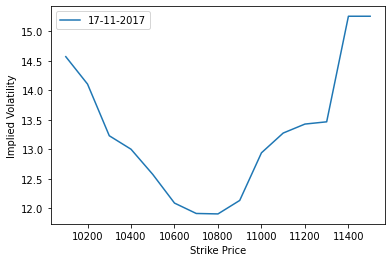

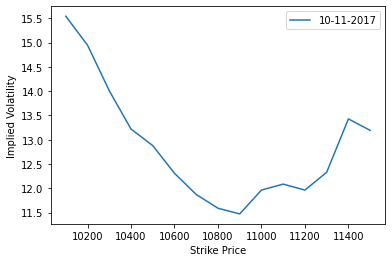

In [0]:
Plot_smile('17-11-2017')
Plot_smile('10-11-2017')
plt.show()

It is observed that the implied volatility curve is in the shape of a smile and is not flat as suggested by the assumption in BSM model. Therefore the underlying does not follow a lognormal distribution, but follows a modified random walk. The Derman Kani Model and Heston Models were developed to correct this false assumption in the BSM model.

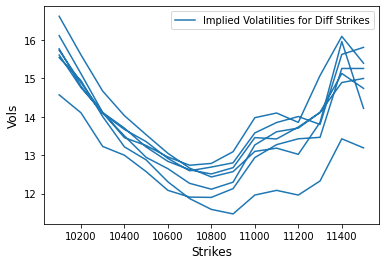

In [0]:
strikes_grid = nifty_data['Strike Price']
expiry = nifty_data['Time to Expiry'] # years
implied_vols = nifty_data['IV'] # can interpolate here
actual_data = nifty_data['Underlying Value']   # cherry picked the data for given expiry

fig, ax = plt.subplots()
#plt.axes(projection='3d')
ax.plot(strikes_grid, implied_vols, label="Implied Volatilities for Diff Strikes")
#ax.plot(strikes_grid, actual_data, "o", label="Actual")
ax.set_xlabel("Strikes", size=12)
ax.set_ylabel("Vols", size=12)
legend = ax.legend(loc="upper right")

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=15,15 m=119 fp=nan s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


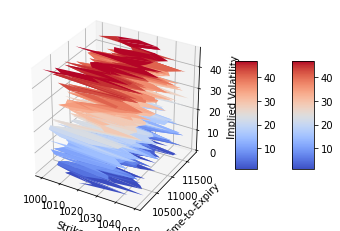

In [0]:
from matplotlib import cm
from scipy.interpolate import interp2d

ttm = nifty_data['Time to Expiry']
strikes = nifty_data['Strike Price']
imp_vol = nifty_data['IV']
f = interp2d(strikes,ttm,imp_vol, kind='cubic')
 
plot_strikes = np.linspace(nifty_data['Strike Price'].min(), nifty_data['Strike Price'].max(),25)
plot_ttm = np.linspace(0, nifty_data['Time to Expiry'].max(), 25)
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(plot_strikes, plot_ttm)
M = np.random.randint(1000,1050, 625)
Z = M.reshape(len(X), len(X[0]))
#Z = np.array([f(x,y) for xr, yr in zip(X, Y) for x, y in zip(xr,yr) ]).reshape(len(X), len(X[0]))

surf = ax.plot_surface(Z, X, Y, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('Strikes')
ax.set_ylabel('Time-to-Expiry')
ax.set_zlabel('Implied Volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)